
# Project: Investigate The Movie Database(TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction and Analysis of Movies Data

> In this data analysis study, I am analyzing the TMDb movie dataset. This data set contians information about 10,000 movies collected from the The Movie Database(TMDb).  The TMDb movie data is cleaned from original data on Kaggle. This dataset provides information on various movies released from 1966 to 2015.  This movie dataset includes information such as the user ratings, budget, revenue, production companies, directors, vote average, popularity and much more.

> My goal for this project is to perform, data cleaning, data wrangling, exploratary data analysis and derive some insights from this dataset. In order to achieve this goal, I need to do a few steps.  They are as follows:

> Step 1 - I look through the comma separated values(CVS) data that is in an Excel format.  I analyze this Excel sheet to see what variables are present.  In addition, I am also familiarizing and getting acquinted with the Excel dataset.

> Step 2 -  I load the necessary Python libraries such as Pandas, Numpys and others on Jupyter Notebook so we can read the data.  I take the raw comma separated values(.cvs) data and load(import) the data on to Jupyter Notebook. Jupyter Notebook will convert the data into a pandas dataframe object. 

> Step 3 - I analyze the structure of the dataset. I perform some data cleaning and data wrangling.

> Step 4 - I derive several questions on the given dataset.  Please see section on "Questions on Dataset" 

> Step 5 - I perform exploratory data analysis to see if there are patterns and trends based on the questions I have. One way to see the trends associated with the data is to visualize it through various graphical plots and statistics.

> Step 6 - I provide conclusions and limitation on the dataset.

# Questions on Dataset

These questions I have about the TmDB dataset.  They are as follows:

1.  What is the pattern for movie production year over year?
2.  Which genre was the most popular?
3.  What are the top 10 movies with the highest revenue?
4.  Does vote average ratings affect profits?
5.  Does budget affect profits?

<a id='wrangling'></a>
# Data Wrangling

> In this section of the report, I will load in the movie data, check for cleanliness, and then trim and clean the movie dataset for analysis.  I will also be documenting my data wrangling process one step at a time.


## 1.  Loading and Inspecting the Movie Database


In [165]:
# Packages imported for this analysis
import csv
from datetime import datetime
#%pylab inline
import numpy as np
% matplotlib inline

import pandas as pd
import seaborn as sns
#sns.set(style="whitegrid", color_codes=True)
sns.set_style('whitegrid')
import matplotlib as mpl
import matplotlib.pyplot as plt
# matplotlib.style.use('seaborn-paper')


In [166]:
# Loading my data and printing out a few lines. I am performing operations to 
# inspect the data types and look for instances of missing data.
# The following code reads all the TMDb data into Pandas DataFrame.  Pandas stores 
# data into a dataframe. My datafame is called movies_df.
# Empty data will be filled in as NaN
# The explanation of the dataset can be found on
# https://www.kaggle.com/tmdb/tmdb-movie-metadata
movies_df = pd.read_csv('tmdb-movies.csv', keep_default_na=True)


In [167]:
# Return shape to see how much data we have to work with on this CSV file.
# From the data below we know that there is 10866 rows and 21 columns.
movies_df.shape

(10866, 21)

In [168]:
# Show the count and data types for all columns
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the data information above, I already know that not all data columns has values.  
There were missing values for imdb_id, cast, homepage, director, tagline, keywords, overview,
genres and production companies. Hence, I need to address the missing values during our data cleaning process.


In [169]:
# Inspect the data with .head
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The .head() function shows the data without 
having to load the entire dataset. It reveals
the first 5 rows of the dataset.  It shows all the 'columns' for each movie 'row'. The .head() function is extremely useful when I want to scan the first few rows of a very large dataset.

In [170]:
# Inspect the data with .tail
movies_df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


The .tail() function shows the data in the last 5 rows of the dataset.  It shows all the 'columns' for each movie 'row' on the bottom of the dataset. Again, the .tail() function is extremely useful when I want to scan the last few rows of a very large dataset.

At a high level, when I compare the .head() and .tail() function, I can inspect the type of dataset that is available without downloading the entire dataset. I am able to observe the various variables that is present on the dataset.


In [171]:
# Here are some statistics with pd.describe
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The pd.describe function provides statistical information that maybe needed 
in this project later.

## 2.  Data Cleaning 

I have seen the structure of the data.  I already know that there are missing values in the data.  There might be other problems in the data which needs to be cleaned.  I perform those cleaning steps in this section.

Some of the data cleaning steps which I would be doing are identifying missing values, dropping unnecessary columns, detecting duplicate records and filling missing values.  

Now, let's see what column has missing data, how many missing values, and what percent of the column has missing data.  This will give me an insight of not only the number of missing values, but also the significance of the missing data.

In [172]:
# Find how many missing values and percentage missing in each column
print 'Missing data in each Movies dataframe column:'
for c in movies_df.columns:
    missing_data = len(movies_df) - movies_df[c].count()
    if (missing_data > 0 or missing_data == 'NaN'):
        print c, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(movies_df))) * 
        100, 3)), '% of total'
    

Missing data in each Movies dataframe column:
imdb_id : 10 missing values is 0.092 % of total
cast : 76 missing values is 0.699 % of total
homepage : 7930 missing values is 72.98 % of total
director : 44 missing values is 0.405 % of total
tagline : 2824 missing values is 25.989 % of total
keywords : 1493 missing values is 13.74 % of total
overview : 4 missing values is 0.037 % of total
genres : 23 missing values is 0.212 % of total
production_companies : 1030 missing values is 9.479 % of total


From the data, there are few missing values in the imdb_id, cast, director, 
overview, genres and production_companies columns. In addition, there is a huge amount of missing values on homepage, tagline and keywords.  

There are various methods to deal with the missing data.  There are pros and cons on each of these methods.

<ul>
<li>Drop the value (unneccessary columns)</li>
This method is acceptable if there is not enough data on the variable. In the movie database, we can drop "homepage" because this column has over 70% of missing data.
<li>Drop duplicate record</li>
<li>Assign values to the missing data</li>
This is perhaps more suitable for categorical variables such as "genres".  This would perhaps not work for numerical data.
</ul>

As shown in the missing data findings above, we do not have to worry about assigning mean/median/mode value to our dataset as there is no concern over the numerical data. In addition, we do not have to predict any missing numerical data as well. 
  

### A. Drop unnecessary columns

The "homepage" column has over 70% missing values.  As a result, we will remove this column from our analysis.

### 1. Drop the homepage column

In [173]:
movies_df.drop(['homepage'], axis = 1, inplace = True)


### 1.a.  Check to see if the 'homepage' column is dropped?

In [174]:
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Also, the imdb_id, cast, director, tagline, keywords, overview and production_companies are not required to answer my analysis questions. Hence, we are dropping these columns as well.

### 2. Drop imdb_id, cast, director, tagline, keywords, overview and production_companies columns.  This too are not required for the analysis.

In [175]:
movies_df.drop(['imdb_id','cast', 'director','tagline','keywords','overview','production_companies'], axis = 1, inplace = True)

### 2.b. Let's check and see if the above columns have been dropped

In [176]:
movies_df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### B. Are there any duplicate rows in the movie dataset?

In [177]:
sum(movies_df.duplicated())

1

There is one duplicate record.

### Show the duplicate row

In [178]:
for i, v in movies_df.duplicated().iteritems():
    if (v):
        print (movies_df.loc[i])

id                                                      42194
popularity                                            0.59643
budget                                               30000000
revenue                                                967000
original_title                                         TEKKEN
runtime                                                    92
genres            Crime|Drama|Action|Thriller|Science Fiction
release_date                                          3/20/10
vote_count                                                110
vote_average                                                5
release_year                                             2010
budget_adj                                              3e+07
revenue_adj                                            967000
Name: 2090, dtype: object


This is a duplicate record and should be removed from the dataset.

### Remove the duplicate record.

In [179]:
movies_df.drop_duplicates(inplace = True)

### Confirm that there are no duplicates

In [180]:
sum(movies_df.duplicated())

0

### C.  Cleaning Missing Data in Genres

There are several missing values on "genres" from the movie dataset.  There were only 0.212 % (23 records) missing in the Genres column.  Since there are so few missing values, I replaced the missing genre values with the most common value in this column.   

In [181]:
# Fill empty/NaN genre values with the most common genre value
movies_df['genres'] = movies_df['genres'].fillna(value=(movies_df['genres'].value_counts().idxmax
()))

# Print unique genres and their counts
movies_df['genres'].value_counts()

Drama                                             735
Comedy                                            712
Documentary                                       312
Drama|Romance                                     289
Comedy|Drama                                      280
Comedy|Romance                                    268
Horror|Thriller                                   259
Horror                                            253
Comedy|Drama|Romance                              222
Drama|Thriller                                    138
Comedy|Family                                     102
Action|Thriller                                   101
Thriller                                           93
Drama|Comedy                                       92
Animation|Family                                   90
Crime|Drama|Thriller                               81
Crime|Drama                                        74
Comedy|Horror                                      72
Drama|Comedy|Romance        

I have replaced the missing genre values with the most common value of the column. The missing values are now filled.

In [182]:
# Let's check the count in the genre column
movies_df['genres'].describe()

count     10865
unique     2039
top       Drama
freq        735
Name: genres, dtype: object

"count" is the total number of values in column. After filling in with the most common values, genre now shows that there are no missing values. It has 10865 records which is the total number of entries of the movie dataset.
"top" describes the most common value which is the "Drama" genre. "freq" is the most common value frequency.  As such, the "Drama" genre frequency is 735. 
"unique" returns an array of all unique values in the column, which is 2039.

#### Now, let's verify if there are any missing values in genre by using the .info() function.

In [183]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10865 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.2+ MB


As you can see in the above information, the missing values are filled in genres.  In addition, the rest of the columns shows "non-null". 

In [184]:
# Let's check again to see if there are any missing values?
print movies_df.isnull().values.any()

False


In [185]:
# Total missing values for each feature
print movies_df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64


To the best of my knowledge, I have completed the data cleaning process.  It is now time to do exploratory data analysis.

<a id='eda'></a>
## Exploratory Data Analysis

> I have trimmed and cleaned my data, I am ready to move on to data exploration. I will be computing statistics and creating visualizations with the goal of addressing the research questions that I had posed in the Introduction section. 

### Research Question 1  
### What is the movie production pattern year over year?

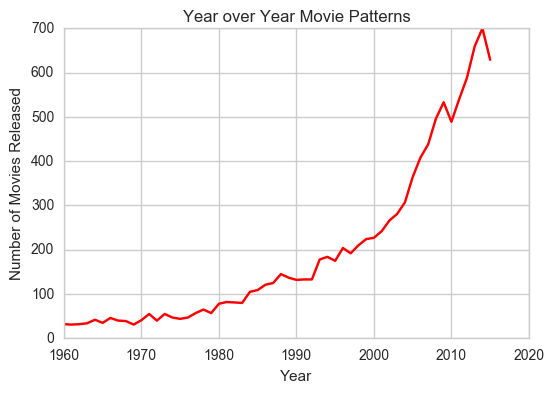

In [186]:
# Movie Distribution
movies_year_over_year = movies_df['release_year'].value_counts().sort_index();
plt.plot(movies_year_over_year, color='r');
plt.title('Year over Year Movie Patterns');
plt.xlabel('Year');
plt.ylabel('Number of Movies Released');



From the graph above, we know that the production of movies has increased tremendously over the years.  There is a demand for movies by the public.  This is a great indicator that the movie production companies should continue to produce movies for public consumption.

### Research Question 2
### Which genres are popular?

I now know from the line graph above, the movie production has increased over the years. Movies are very much in demand.  But which genre is being produced the most by the production companies? Does the type of genre dictate how production companies generate the most revenue? Let's figure out which genres are popular.

In [187]:
# Prepare the Dataframe
movie_genres = movies_df.copy()
# Check the columns in the movie_genres dataframe
movie_genres.head(1)


,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [188]:
# In this research question the focus of our analysis are genres.  So, I am going 
# to pay particular attention to the 'id'  and 'genre' column.

# Choose all the rows
# Select the 'id' and 'genres' column
genre = movie_genres.loc[:,['id','genres']]
# Inspect the first five rows
genre.head(5)

,id,genres
0,135397,Action|Adventure|Science Fiction|Thriller
1,76341,Action|Adventure|Science Fiction|Thriller
2,262500,Adventure|Science Fiction|Thriller
3,140607,Action|Adventure|Science Fiction|Fantasy
4,168259,Action|Crime|Thriller


In [189]:
# Let's split the genres at the pipe and add to a list
genre_list = genre['genres'].str.split('|').tolist()
# Inspect the first 3 elements on the list
genre_list[:3]

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller']]

Genres are now split

In [190]:
# Loop through each nested list in genre_list.
# Check that each genre_list is a list and convert to list
# We are using isinstance function which returns a Boolean(True or False). It checks
# to see if the object passed in the first argument is of the type of any of the 
# type objects passed in the second argument.
# If genre_list is not a list then it returns false and loop will be repeated
# If data type is not a list then a TypeError exception is raised and loop will be repeated
# Continue with this process until we reach the last element on the genre_list
for i in range(len(genre_list)):
    if not isinstance(genre_list[i], list):
        genre_list[i] = [genre_list[i]]
        


#### Let's check to see how the data is formatted on the genre list.

In [191]:
check_genre = pd.DataFrame(genre_list, index=genre['id'])

In [192]:
print(check_genre.head())

                0                1                2         3     4
id                                                                 
135397     Action        Adventure  Science Fiction  Thriller  None
76341      Action        Adventure  Science Fiction  Thriller  None
262500  Adventure  Science Fiction         Thriller      None  None
140607     Action        Adventure  Science Fiction   Fantasy  None
168259     Action            Crime         Thriller      None  None


In [193]:
# Let's reshape the data format above. Why? From the result above, there are
# multiple columns with an individual genre value per id,
# I am going to create a new dataframe(stacked_genre) using genre_list and the id column 
# of the 'genre' dataframe as the index.  To reshape the data format, I need
# to apply .stack() to pivot the data.
# https://pandas.pydata.org/pandas-docs/stable/reshaping.html

In [194]:
stacked_genre = pd.DataFrame(genre_list, index=genre['id']).stack()

In [195]:
print(stacked_genre.head())

id       
135397  0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
76341   0             Action
dtype: object


In [196]:
# Since the "id" has become the index then we want to reset this 
stacked_genre = stacked_genre.reset_index()

In [197]:
print(stacked_genre.head())

       id  level_1                0
0  135397        0           Action
1  135397        1        Adventure
2  135397        2  Science Fiction
3  135397        3         Thriller
4   76341        0           Action


As seen above, I have the following index "0", "1",......"4".  It is a good practice to 
have indexes so I can extract unique genres from the dataframe.

In [198]:
# Let's get rid of "level_1" column.  I do not need it.
stacked_genre = stacked_genre.loc[:, ['id', 0]]

In [199]:
print(stacked_genre.head())

       id                0
0  135397           Action
1  135397        Adventure
2  135397  Science Fiction
3  135397         Thriller
4   76341           Action


In [200]:
# Now, let's rename the "0" column to "genre"
stacked_genre.columns = ['id', 'genre']

In [201]:
print(stacked_genre.head())

       id            genre
0  135397           Action
1  135397        Adventure
2  135397  Science Fiction
3  135397         Thriller
4   76341           Action


In [202]:
# Merge stacked_genre and movie_genres and drop columns we do not need
merged_df = pd.merge(movie_genres, stacked_genre, on='id', how='left')
# We will drop the "genres" and "id" column so we have clear breakdown of columns with 
# proper genre splits and indexes
merged_df.drop(['genres', 'id'], axis=1, inplace=True)

In [203]:
# Let's inspect the first five rows with its columns
merged_df.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


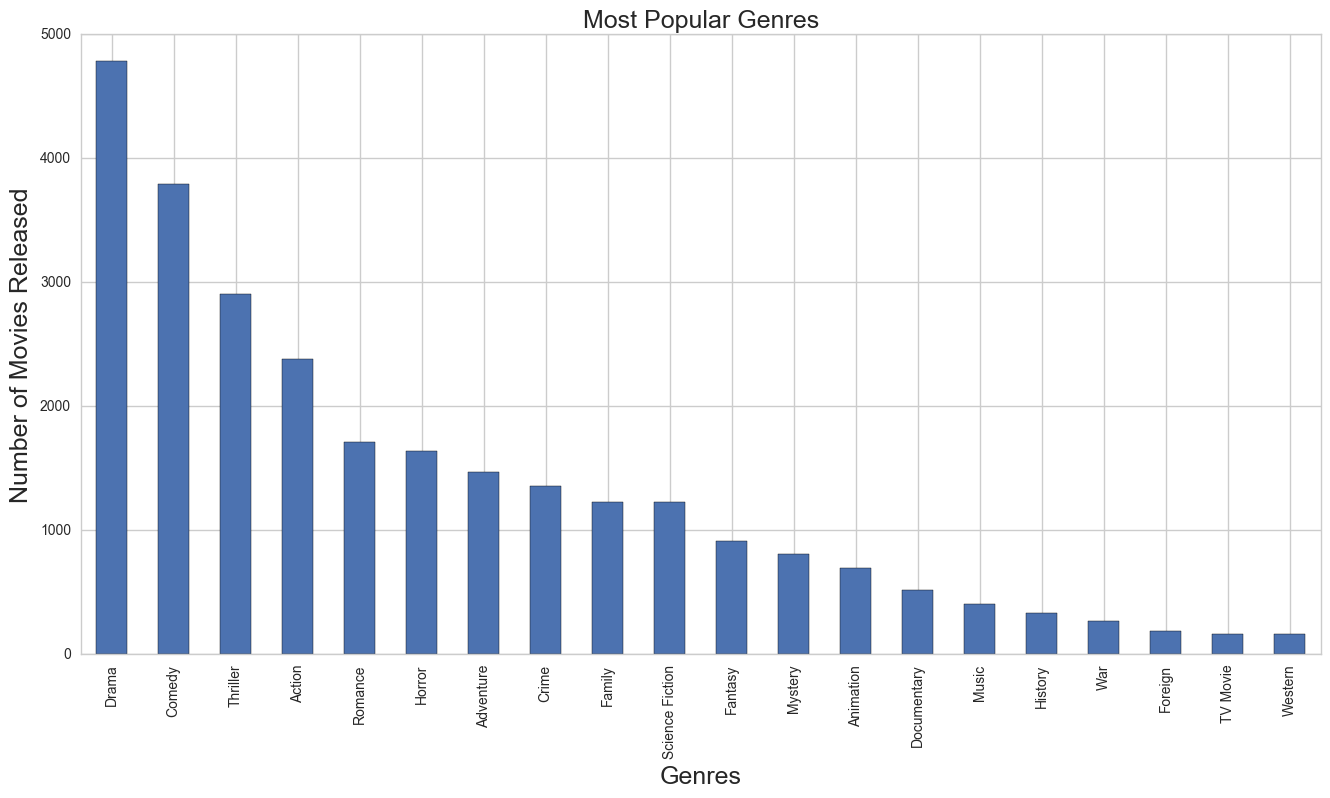

In [204]:
# Let's visualize the genres using a bar graph
merged_df['genre'].value_counts().plot(kind='bar', figsize=(16, 8));
plt.title('Most Popular Genres', fontsize = '18');
plt.xlabel('Genres', fontsize = '18');
plt.ylabel('Number of Movies Released', fontsize = '18');

"Drama" is the most common genre amongst the movie releases. It clearly shows that this genre continue to be popular with the production companies. The second most popular genre is "Comedy" followed by the third popular genre which is "Thriller".  Films within the drama, comedy, thriller and action genres generated the most movie releases.  The bar graph above gives a good indication to movie production companies as to which genres that they need to produce for public viewing comsumption.

### Research Question 3
### What are the top 10 movies with the highest revenue?

I want to find out which specific movies brought the most box office revenues between 1966 and 2015.

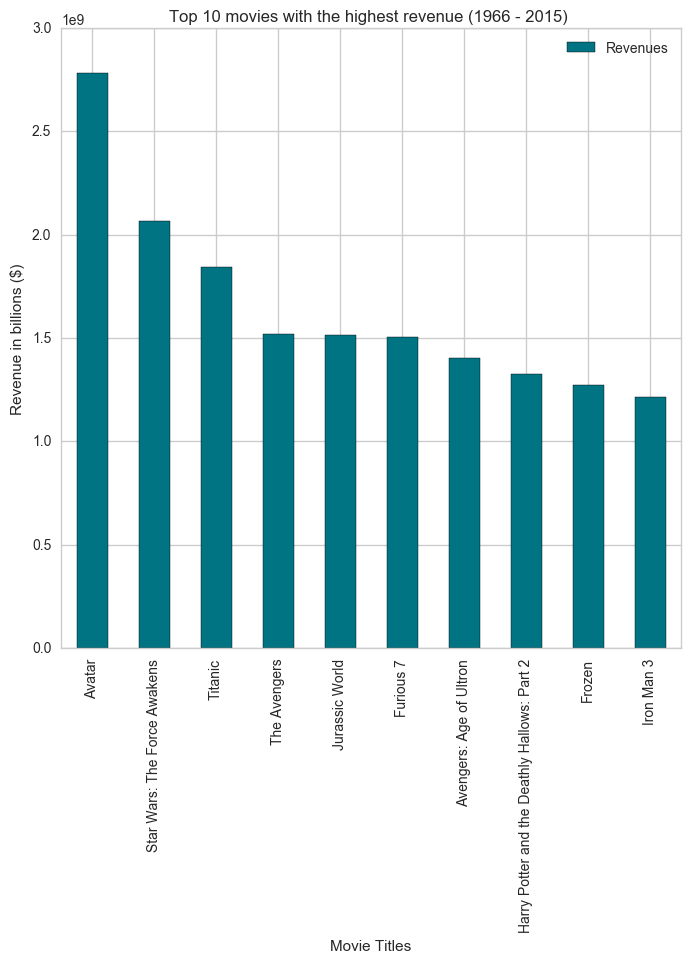

In [205]:
# Sort the revenues starting with the higest dollar amount up to 10 records
sorted_revenue = movies_df['revenue'].sort_values(ascending=False)[:10]

# Create a new dataframe ("high_revenues") so we can store the result in a list.
# We are looping through records that has top 10 revenues in dollars and 
# extracting through a column, namely"original_title" of this dataframe("high_revenues"). 
# The result is a list of movie titles with the top 10 revenues.
# To see the result, I plotted a bar graph and a table.

high_revenues=pd.DataFrame()
titles=[]
revenues=[]
for i in sorted_revenue.index:
    titles.append(movies_df.loc[i,'original_title'])
    revenues.append(sorted_revenue.loc[i])
high_revenues['Movie Titles']=titles
high_revenues['Revenues']=revenues
high_revenues.set_index('Movie Titles',inplace=True)
high_revenues.plot(kind ='bar',color = '#007482', figsize=(8,8))
plt.title('Top 10 movies with the highest revenue (1966 - 2015) ');
plt.ylabel('Revenue in billions ($)');


In [206]:
# From the code above we created the "high_revenues" dataframe and assigned "Movie Titles" 
# as the index for this dataframe. The column "Revenues" has top ten highest grossing movies.
# The "high_revenues" table would look like as follows:

high_revenues

,Revenues
Movie Titles,
Avatar,2781505847
Star Wars: The Force Awakens,2068178225
Titanic,1845034188
The Avengers,1519557910
Jurassic World,1513528810
Furious 7,1506249360
Avengers: Age of Ultron,1405035767
Harry Potter and the Deathly Hallows: Part 2,1327817822
Frozen,1274219009


Movie with the highest box office revenue is "Avatar" with a revenue of approximately 2.8 billion dollars.  "Star Wars:The Force Awakens" came in second at about 2 billions dollars.  "Titanic" came in third at 1.8 billion dollars.

In the next set of investigation, we want to determine if there is a mutual reltionship between two quantitative variables. When we say mutual relationship, we are refering to "correlation". It measures the degree to which two variables are related, or move together.  Typically, correlation is the first step to understanding the relationship of two variables. 

In order to learn the relationship between the two variables, we first need to create and examine a scatter plot of the chosen variables to check for linearity.  The next step would be to calculate the measure of strength of this linear relationship between this paired data. There are multiple correlation statistics calculation but the most common one is Pearson's correlation coefficent. It is a statistical measure that calculates the magnitude of the association between the movements as as well as the direction of the two variables.  The coefficient ranges in value from -1 to 1.  Values close to 0 usually signifies no or weak relationship.  Positive correlations indicate the variable tend to move together, while negative correlations indicate the variable tend to move in opposite directions.

Let's investigate...

### Research Question 4
### Does vote average ratings correlate with profits received from the movies?

In [207]:
# Let's figure out the profit values of each movie. Here are the steps for it:
# We insert a new column which will hold the profit values of each movie.
# The function first argument is an index number given to identify the new column.
# The second argument takes the name of the new column,"profit" and finally we do the calculation 
# to output the profit in the new column.
# Let's calculate the profit by subtracting the budget from the revenue of each movie
movies_df.insert(4,'profit', movies_df['revenue'] - movies_df['budget'])
# We change the datatype to int
movies_df['profit'] = movies_df['profit'].apply(np.int64)
# Let's check to see if the "profit" column shows up
movies_df.head(5)

,id,popularity,budget,revenue,profit,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,185238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,1316249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I now have the 'profit' column.

### Let's see it visually using a scatter plot

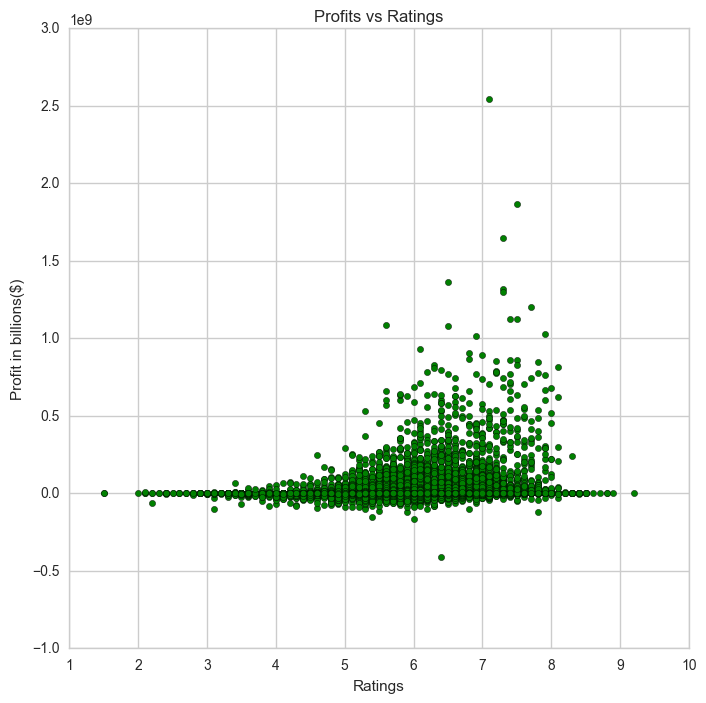

In [208]:
movies_df['profit'] = movies_df['revenue']- movies_df['budget']
movies_df.plot(x='vote_average', y='profit',kind='scatter', color='green', figsize=(8,8));
plt.ylabel('Profit in billions($)');
plt.xlabel('Ratings');
plt.title('Profits vs Ratings');

### Calculating Correlation in Pandas

In [209]:
movies_df['vote_average'].corr(movies_df['profit'])

0.18306721080232485

### Calculating Correlation in Numpy

In [210]:
np.corrcoef(movies_df.vote_average,movies_df.profit)

array([[ 1.        ,  0.18306721],
       [ 0.18306721,  1.        ]])

From the scatter plot and the calculation of the correlation coefficient above, the vote average ratings has a low degree of correlation with profits. Hence, we can safely predict that the vote average ratings has a very weak correlation with profits.

### Research Question 5
### Does budget correlate with profits received from the movies?

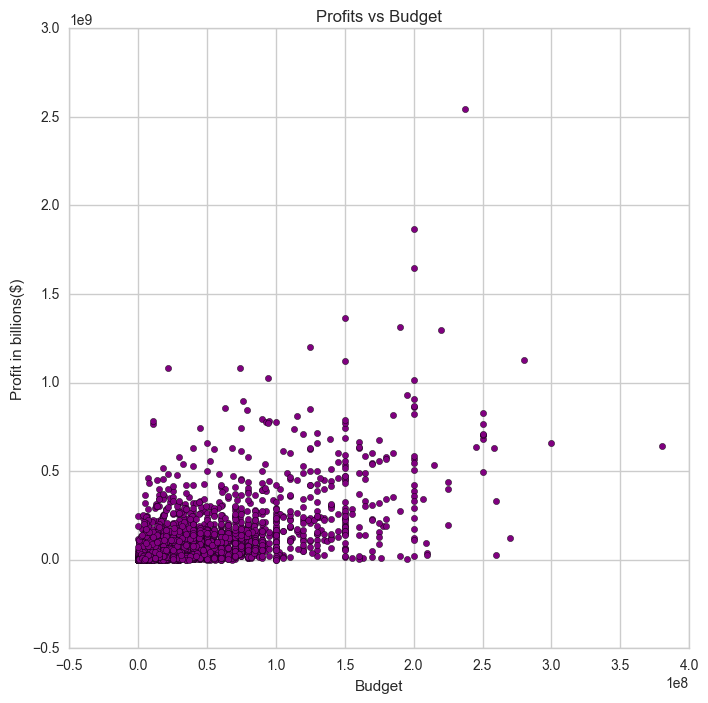

In [211]:
movies_df2 =movies_df[(movies_df['budget']>0) & (movies_df['profit']>0)]
movies_df2.plot(x='budget', y='profit',kind='scatter', color='purple', figsize=(8,8));
plt.ylabel('Profit in billions($)');
plt.xlabel('Budget');
plt.title('Profits vs Budget');

### Calculating Correlation in Pandas

In [212]:
movies_df2['budget'].corr(movies_df2['profit'])

0.59133831754940169

### Calculating Correlation in Numpy

In [213]:
np.corrcoef(movies_df2.budget,movies_df2.profit)

array([[ 1.        ,  0.59133832],
       [ 0.59133832,  1.        ]])

From the scatter plot and the correlation coefficient calculation above, budget has a moderate degree of correlation with profits.  Hence, we can safely predict that budget has a positive medium relationship with profits.

## Conclusions

In summary, I know that the demand for movies has increased tremendously over the years. It is safe to say movie production companies should continue to create more movies for consumers. When it comes to genre, it is clear that "Drama", "Comedy", "Thriller", "Action", and "Romance" are the most popular genres.  Movie production companies should definitely focus on producing movies in these popular genres.  The public seem to like movies coming out of these genres. 

Consumers are willing to spend the money to watch movies and they love it. The movie industry is definitely generating lots of revenue for the U.S. economy.  The top 10 high grossing movies generated revenues between 1.2 billion to 2.8 billion dollars. This is a phenomenal revenue growth. The U.S. film entertainment is a huge business within the U.S. and international markets. As a result, it creates jobs, revenue for small businesses, infrastructure investments and film-induced tourism.

One might think that vote average ratings would have a positive impact on the profits.  However,based on Pearson's correlation coefficient statistical calculation, it had a very weak relationship. As a result, the vote average ratings does not impact the profits.  As for correlation between budget and profits, there was a positive movement together.  However, it is not a perfect positive movement. There were some movies with high budgets but low revenues and vice versa. 

## Limitations

Removal of columns may have impacted the results of my overall analysis.  The correlations explained do not imply causations. The inferences have scope for further improvements. I am not sure if the revenues and budgets are in US currency. In addition, it also seems that there are awkward small and large dollar values in budget and revenue columns. Hence, I am not sure if the data provided is accurate and up-to-date.

### Resources
I used Stack Overflow, wblakecannon/titanic-investigation github, onpillow/Udacity-DAND-Term1 github, antra0497/Udacity--Project-Investigate-TMDB_Movies_Dataset github, Learn Python The Hard Way book, DataOptimal blog, Welcome To Data Science Demonstrated! blog, https://docs.python.org website, https://www.crybit.com website, https://pandas.pydata.org website, https://hackernoon.com website, http://www.datasciencemadesimple.com website and https://pythonhow.com website.


In [214]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

-1